In [169]:
import pandas as pd
import os
import pickle
import jieba
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.font_manager as fm
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import seaborn as sns
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import re
jieba.set_dictionary('dict_txt_big.txt')

In [170]:
with open('news.pkl','rb') as file:
    data = pickle.load(file)
data.shape

(247273, 9)

In [171]:
data = data.dropna()
data.reset_index(drop=True, inplace=True)
data.shape

(237783, 9)

In [172]:
def filters(parag):
    r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    
    bye = ['鉅亨網編譯','<BR>','中央社','有限公司','成交量', '公司','成交','基金','上半年','去年同期',
            '同期', '交易日', '下半年','今年','第二季', '第三季', '第四季', '因此','美式','交易','交易所'
          '以及', '目前', '近期', '最近']
    for x in bye:
        parag = parag.replace(x,'')
        
    parag = re.sub(r1, '', parag)
    
    return parag

def fil_OR(para, company_list):     # 其中一個關鍵字有就取
    for x in company_list:
        if x in para:
            return True
    return False
    
def fil_AND (para, keyword):         # 連集
    for x in keyword:
        if x not in para:
            return False
    return True

# 停用詞

In [173]:
stopwords = [line.rstrip() for line in open('stop.txt', encoding='utf8') ]

In [174]:
#中國投資
stopwords += ['投資人','思考','能力','半導','導體','大法','新聞來源','來源','工商','時報','投資','分析','分析師','之用',
              '國大', '大陸','關係','關係人','臺幣', '新臺幣','觀測','觀測站','讀者','務請','供參考','建議']
# 營造建材停用詞：
#stopwords += ['美國','中國','市場','指數','創新','億元','公開','董事','合作','技術','國際','產業','總統','企業','不過']

#半導體停用詞：
#stopwords += ['指數','億元','市場','今日','個股','未來','終場','國際','美國','族群','觀察','經濟','台北','盤中','不過',
              #'投資人', '思考','能力','半導體','半導','導體','大法']

#金融
#stopwords += ['指數','億元','市場','今日','個股','未來','終場','國際','美國','族群','觀察','經濟','台北','盤中','不過',
 #             '投資人', '思考','能力','半導體','半導','導體','大法','金融股','金融', '收在','盤面','均線','關卡','尾盤',
  #            '現貨','大指','上攻', '上週五', '數下', '半年前','強勢','時報', '工商','新聞來源', '日報', '團隊','奇摩',
   #          '出刊','財寶','多元','希望', '頭條', '客戶', '成立', '純益', '不適', '事項', '處分', '觀測','萬股', '測站',
    #          '觀測站', '新台幣', '損益', '姓名', '辦理', '會計', '生日', '實發', '財務報表','意見', '瓦斯','水電','輸入',
     #        '會計師','約定','代號','華金', '配對','中石', '推薦', '依次', '合股', '名次','股票名稱', '金像', '二日', '買賣',
      #       '聯大', '成鋼','嘉聯', '聯益','日光','光寶','山金','大成','收盤價', '昨日', '行情', '整理', '提供','公布','明年',
       #      '去年','第一', '經理', '企業','每股', '萬元','本次','事項', '日期', '股金', '單位','營商','新科','自營','如下',
        #      '華新']



In [143]:
len(stopwords)

2040

# 過濾新聞與選定關鍵字

# for 文字雲

In [175]:
keyword = ['中國','投資']
num = 0
with open('cloud_text.txt', 'w') as f:
    for x in tqdm_notebook(range(0, len(data))):
        para = data.loc[x,'content']
        if fil_OR(para, keyword):
            para = filters(para)
            f.write(para)
            num += 1
        
num

/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/tqdm/__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


94838

# for LDA

In [147]:
keyword = ['中國','投資']
num = 0
with open('LDA.csv', 'w') as f:
    f.write('content' + '\n')
    for x in tqdm_notebook(range(0, len(data))):
        para = data.loc[x,'content']
        if fil_OR(para, company_list):
            para = filters(para)
            f.write(para + '\n')
            num += 1
        
num

/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/tqdm/__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


16553

In [148]:
data_lda = pd.read_csv('LDA.csv')

def lda_wordcut(my_text):
    word_after_jieba = jieba.cut(my_text, cut_all = True)
    wl_space_split = ''
    for word in word_after_jieba:
        if word not in stopwords:
            if re.findall(r'^[^\d]\w+', word):
                wl_space_split += word + ' '
    return wl_space_split

data_lda['content_cut'] = data_lda.content.apply(lda_wordcut)
data_lda['content_cut']

0        封關 四大 加碼 買進 國泰 總計 投入 政府 升息 因素 消除 上證 上證所 廢除 購車 ...
1        封關 四大 加碼 買進 國泰 總計 投入 政府 升息 因素 消除 上證 上證所 廢除 購車 ...
2        元月 登場 場外 外資 結束 長假 歸隊 可望 帶動 大盤 年底 大盤 低迷 逆勢 外資 加...
3        封關 戲劇 戲劇性 演出 特定 買盤 急拉 國泰 金台 台塑 南亞 打破 原本 沉悶 加權 ...
4        完勝 三星 製程 強壓 對手 蘋果 代工 工大 可望 三星 暫緩 擴廠 腳步 車展 換新 訂...
                               ...                        
16548    痛失 萬點 萬點大關 大關 多頭 轉折 面對 難測 新富 五大 預測 有機 機會 再戰 萬點...
16549    經歷 波動 劇烈 年後 面對 第一季 一季 操作 統一 法人 建議 挑選 法人 人機 機構 ...
16550    金管會 統計 計年 銀行 信用 信用卡 金額 創新 新高 時序 信用 信用卡 悄悄 新年 優...
16551    新光 資本 本市 波動 匯率 干擾 單月 稅後 虧損 累計 稅後 獲利 有成 成長 盈餘 餘...
16552    稅後 盈餘 稅後 盈餘 旗下 銀行 國內 最多 營業 據點 拓展 海外 據點 加計 開業 柬...
Name: content_cut, Length: 16553, dtype: object

# 文字雲處理（斷詞 ＋ 進模型）

/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/tqdm/__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


Building prefix dict from /Users/lanjingyi/python code/產經期末報告/dict_txt_big.txt ...
Loading model from cache /var/folders/1b/jh91y5hn0qg5z2g3cp2bcby00000gn/T/jieba.u3d86a300416b820dbd0c897bfee89ebd.cache
Loading model cost 1.852 seconds.
Prefix dict has been built succesfully.


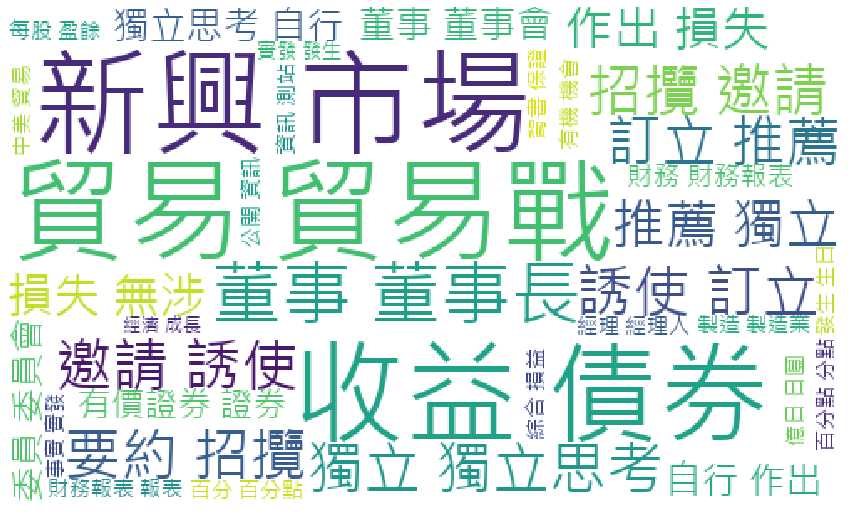

In [176]:
file_text = open('cloud_text.txt').read()
word_after_jeiba = jieba.cut(file_text, cut_all = True)
# 載入停用詞
wl_space_split = ''
for word in tqdm_notebook(word_after_jeiba):
    if word not in stopwords:
        if re.findall(r'^[^\d]\w+', word):
            wl_space_split += word + ' '
            
wc = WordCloud(width=1000,
               height=600,
               min_font_size=20,
               max_font_size=140,
               background_color='white',
               scale=0.5,
               font_path = '/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Microsoft JhengHei.ttf')
my_wordcloud = wc.generate(wl_space_split)
plt.figure(figsize = (15,15))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.savefig("中國投資.png", dpi = 500)
plt.show()

In [75]:
df2_total = pd.read_excel('大陸投資2012-2018_改.xlsx', sheet_name = 9)
df2_total.shape
df2_total = df2_total.drop(columns = ['年月', '轉投資名稱'])
df2_total.rename(columns = {'2017本期匯出金額(NTD)': 2017}, inplace = True)
df2_total = df2_total[['公司代碼','TSE新產業名','TEJ子產業名'] + [x for x in range(2012, 2019)]]
df2_total = df2_total.fillna(0)
df2_total


/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/botocore/awsrequest.py:624: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class HeadersDict(collections.MutableMapping):


,公司代碼,TSE新產業名,TEJ子產業名,2012,2013,2014,2015,2016,2017,2018
0,2330 台積電,M2324 半導體,M23G1A 晶圓代工,0.0,0.0,0.0,0.0,6435200.0,21724892,2361320.0
1,2303 聯電,M2324 半導體,M23G1A 晶圓代工,592943.0,4679315.0,25414.0,1035969.0,4830.0,13244953,17227277.0
2,1326 台化,M1300 塑膠工業,M13A1 泛用塑膠,874680.0,29610.0,456525.0,0.0,2367940.0,6155311,6589991.0
3,2201 裕隆,M2200 汽車工業,M22A 汽車製造,2760978.0,0.0,44310.0,1437410.0,1556621.0,4874572,8591001.0
4,9940 信義,M9900 其他,M25D 仲介建經,457462.0,3868747.0,454477.0,87082.0,0.0,3900696,0.0
...,...,...,...,...,...,...,...,...,...,...
667,9943 好樂迪,M2700 觀光事業,M27B 觀光遊樂區,0.0,0.0,0.0,0.0,0.0,0,0.0
668,9944 新麗,M9900 其他,M14F 不織布,0.0,0.0,0.0,0.0,0.0,0,0.0
669,9945 潤泰新,M9900 其他,M25A 建設,0.0,0.0,158250.0,0.0,0.0,0,0.0
670,9955 佳龍,M9900 其他,M99L1 貴金屬回收,0.0,0.0,0.0,0.0,0.0,0,0.0


In [146]:
company_list = df2_total.groupby('TSE新產業名').get_group('M2800 金融業')['公司代碼']
company_list = list(company_list)
company_list = [x[5:] for x in company_list]
company_list

['國泰金',
 '合庫金',
 '開發金',
 '玉山金',
 '群益證',
 '群益期',
 '彰銀',
 '台中銀',
 '中壽',
 '臺企銀',
 '遠東銀',
 '華南金',
 '富邦金',
 '元大金',
 '兆豐金',
 '台新金',
 '新光金',
 '國票金',
 '永豐金',
 '中信金',
 '第一金',
 '王道銀行',
 '上海商銀']

In [14]:
'包括' in stopwords

False

# LDA

In [149]:
n_features = 1000

In [150]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features = n_features,
                                stop_words = 'english',
                                max_df = 0.5,
                                min_df = 10)

tf = tf_vectorizer.fit_transform(data_lda['content_cut'])

In [155]:
n_topics = 10
lda = LDA(n_components = n_topics, 
          max_iter = 50,
          learning_method = 'online',
          learning_offset = 50,
          random_state = 0)



In [156]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [157]:
n_top_words = 20
def print_top_words(model, features_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic #%d:'% topic_idx)
        print(' '.join([features_names[i] for i in topic.argsort()[:-n_top_words - 1: -1]]))
    print()
        
tf_features_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_features_names, n_top_words)


Topic #0:
認購 國泰 新光 大金 股票 券商 中信 玉山 永豐 南亞 遠東 統一 歐式 亞科 開發 數量 名稱 價格 石化 中石化
Topic #1:
電子 上漲 表現 持續 新高 帶動 元件 指標 震盪 留意 被動 反彈 高點 漲幅 股價 短線 漲停 鋼鐵 激勵 走高
Topic #2:
下跌 股價 表現 跌幅 外資 震盪 電子 上漲 漲幅 一度 加權 國泰 反彈 大盤 股市 短線 加權指數 跌破 重挫 持續
Topic #3:
外資 買超 法人 上周 萬張 自營商 加碼 期貨 部位 持續 合計 周五 資金 連續 上周五 本周 平倉 買盤 萬口 統計
Topic #4:
銀行 全球 投資 收益 債券 資產 業務 服務 人民幣 成長 金管會 人壽 稅後 科技 中國 發展 產業 獲利 海外 旗下
Topic #5:
獲利 股價 新高 成長 營運 可望 業績 蘋果 法人 上市 受惠 看好 外資 供應 利率 股東 股利 供應鏈 出貨 產業
Topic #6:
董事 證券 公告 關係 股份 金額 發行 公開 關係人 資訊 法人 財務 價格 股東 說明會 發生 董事會 訊息 年月日 持股
Topic #7:
買進 賣出 金額 股價 證券 外資 收盤 上市 自營商 買超 股票 市值 不含 上漲 中信 億萬 下跌 國泰 億萬元 台塑
Topic #8:
外資 超前 五大 餘額 買超 融資 下跌 融券 變化 萬張 股市 上漲 部位 技術 部份 金額 點收 預期 第三 上揚
Topic #9:
貿易 投資 貿易戰 股市 成長 資金 利率 影響 升息 預期 全球 中國 表現 持續 經理人 美中 風險 科技 景氣 政策



In [158]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./LDA/topic')
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = sklearn_lda.prepare(lda, tf, tf_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './LDA/' +'金融業7topic.html')


CPU times: user 8.59 s, sys: 221 ms, total: 8.81 s
Wall time: 35.6 s


/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [27]:


import re
x = 'a12121assa'
x = '1我爱你1asdjflkdf他'

r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'

print(re.sub(r1, '', x))


我爱你他


In [51]:
import re
L = ['小明', 'xiaohong', '12', 'adf12', '14']
r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
for i in range(len(L)):
    if re.findall(r'^[^\d]\w+', L[i]):
        print(re.findall(r'^\w+$', L[i])[0])


小明
xiaohong
adf12


In [120]:
data.groupby('author').size()

author
Moneydj理財網                           62056
PR Newswire Asia info@prnasia.com      943
TVBS新聞網                                 11
Yahoo奇摩股市                             1668
中央社                                  27517
中時電子報                                  531
時報資訊                                 76713
法新社                                   1866
財訊快報                                 54658
路透社                                    443
鉅亨網                                  20852
dtype: int64

# 撈實體新聞

In [168]:
num = 0
keyword = ['認購','新光']
with open('news.txt','w') as f:
    for x in tqdm_notebook(range(0, len(data))):
        para = data.loc[x,'content']
        if fil_AND(para, keyword):
            para = filters(para)
            f.write(para+ '\n')
            num += 1
num

/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/tqdm/__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


174